# Metadata
    
    *Title: Final Project Report
    * Class: DS 5100
    * Date: 12/06/2022
    * Student Name: Matt Scheffel
    * Student Net ID: mcs9ff
    * This URL:
    * GitHub Repo URL: https://github.com/mcs9ff/DS-5100-2022-Final-Project

# The Monte Carlo Method

In [1]:
import pandas as pd
import numpy as np
import random
import itertools

class Die:
    '''
    Creates a die that has N sides, or “faces”, and W weights, and which can be rolled to select a face.

    W defaults to 1.0 for each face but can be changed after the object is created.
    The die has one behavior, which is to be rolled one or more times. 
    '''
    die_one = 0
    weights = []
    
    def __init__(self, array_faces):
        '''
        Initializes the class Die.
        
        Takes an array of faces as an argument.
        The array's data type (dtype) may be strings or numbers.
        The faces must be unique; no duplicates.
        Internally initializes the weights to 1.0 for each face.
        Saves faces and weights in a private dataframe that is to be shared by the other methods.
        '''
        self.array_faces = array_faces.tolist()
        self.weights = np.ones(len(self.array_faces))
        #np.ones returns array filled with ones
        
        self.die_one = pd.DataFrame({'Faces':self.array_faces,
                                   'Weights':self.weights.tolist()})
        
    def change_die_weight(self, face_val, new_weight):
        '''
        Changes the weight of a single side of the die.
        
        Takes two arguments: the face value to be changed and the new weight.
        Checks to see if the face is valid.
        Checks to see if the weight is valid.
        '''
        if face_val not in self.die_one.values:
            print("Die does not contain that value. Please try another value.")
            return
        elif face_val in self.die_one.values:
            try:
                float(new_weight)
            except ValueError:
                print("Weight values need to be able to convert to Float.")
                return
        
        self.die_one.loc[self.die_one['Faces'] == face_val, 'Weights'] = new_weight
    
    def roll_die(self, roll_count=1):
        '''
        Rolls the die one or more times.
        
        Takes a parameter of how many times the die is to be rolled; defaults to 1.
        This is essentially a random sample from the vector of faces according to the weights.
        Returns a list of outcomes.
        Does not store results internally.
        '''
        
        type(roll_count) == int

        outcomes = []

        while roll_count > 0:
            
            weight = self.die_one['Weights']
            face = self.die_one['Faces']
            odds = [i/sum(weight) for i in weight]
            outcomes = [random.choices(face, odds) for i in range(roll_count)]
            outcomes = [i[0] for i in outcomes]
            return outcomes

    def show_current_fw(self):
        '''
        Shows the user the die’s current set of faces and weights (since the latter can be changed).
        
        Returns the dataframe created in the initializer but possibly updated by the weight changing method.
        '''
        return self.die_one
    
class Game:
    '''
    Creates a game that consists of rolling of one or more dice of the same kind one or more times.

    Each game is initialized with a list of one or more of similarly defined dice (Die objects).
    By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and set of faces, 
    but each die object may have its own weights.
    The class has a behavior to play a game, i.e. to roll all of the dice a given number of times.
    The class keeps the results of its most recent play.
    '''
    game_one = []

    def __init__(self, similar_die):
        '''
        Initializes the class Game.
        
        Takes a single parameter, a list of already instantiated similar Die objects.
        '''
        self.similar_die = similar_die
        
    def play(self, rolls):
        '''
        Takes a parameter to specify how many times the dice should be rolled.
        
        Saves the result of the play to a private dataframe of shape N rolls by M dice. 
        Each cell should show the resulting face for the die on the roll. 
        '''
        
        for i in self.similar_die:
        
            type(rolls) == int
        
            die_play = [Die.roll_die(self.similar_die[i], rolls)
                            for i in range(len(self.similar_die))]
            self.game_one = pd.DataFrame(die_play)
            #change index name?
        
    def recent_results(self, format_w_n = 'Wide'):
        '''
        Shows the user the results of the most recent play.
        
        Takes a parameter to return the dataframe in narrow or wide form.
        This parameter raises an exception if the user passes an invalid option.
        '''
        if (format_w_n != 'Wide') & (format_w_n != 'Narrow'):
            raise Exception('Format must be wide or narrow.')
        else:
            if format_w_n == 'Wide':
                return self.game_one
            if format_w_n == 'Narrow':
                return self.game_one.stack()

class Analyzer:
    '''
    An analyzer that takes the results of a single game and computes various descriptive statistical properties about it.
    '''
    resultsDF = pd.DataFrame([])
    countDF = pd.DataFrame([])
    jackpotDF = pd.DataFrame([])
    comboDF = pd.DataFrame([])
    
    def __init__(self, game_object):
        '''
        Initializes the class Analyzer.
        
        Takes a game object as its input parameter.
        At initialization time, it also infers the data type of the die faces used.
        '''
        self.game_object = game_object
        self.resultsDF = self.game_object.recent_results()
        
    def face_counts_per_roll(self):
        '''
        A face counts per roll method to compute how many times a given face is rolled in each event.
        
        Stores the results as a dataframe in a public attribute.
        '''
        countDF = pd.DataFrame([])
        countDF = self.resultsDF.T.apply(pd.Series.value_counts, axis=1).fillna(0)
        return countDF
        
    def jackpot(self):
        '''
        A jackpot method to compute how many times the game resulted in all faces being identical.
        
        Returns an integer for the number times to the user.
        Stores the results as a dataframe of jackpot results in a public attribute.
        '''
        
        jackpot_times = 0
        for i in range(0,len(self.resultsDF.columns)):
            col_list = self.resultsDF[i].tolist()
        
            True_False = False
            element = col_list[0]
            for j in range(len(col_list)):
                if element == col_list[j]:
                    True_False = True
                    j += 1
                    
                else:
                    True_False = False
                    j += 1
                    break
            
            if True_False == True:
                jackpot_times += 1
                col_list.insert(0, i)
                self.jackpotDF = pd.concat([self.jackpotDF, pd.DataFrame(col_list).T])
                
            i += 1

        self.jackpotDF = self.jackpotDF.set_index(0, drop=True)
        self.jackpotDF.index.name = 'Roll Number'
        display(self.jackpotDF)
        return jackpot_times
        
    def combo(self):
        '''
        A combo method to compute the distinct combinations of faces rolled, along with their counts.

        Combinations are sorted and saved as a multi-columned index.
        Stores the results as a dataframe in a public attribute.
        '''
        results_transposed = self.resultsDF.T
        comboDF = results_transposed.apply(lambda x: pd.Series
                                          (sorted(x)), 1).value_counts().to_frame('n')
        return comboDF
    

# Test Module

In [6]:
import unittest
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class MonteCarloTests(unittest.TestCase):
    '''
    Tests Die, Game, and Analyzer classes.
    
    '''
    
    def test_change_die_weight(self):
        '''
        Tests the method change_weight() in Die class.
       
        '''
        test = Die(np.array([1, 2, 3]))
        test.change_die_weight(3, 4)
        actual = test.show_current_fw().to_dict()
        placeholder = pd.DataFrame({'Faces':[1, 2, 3], 'Weights':[1., 1., 4.]})
        expected = placeholder.to_dict()
        self.assertEqual(actual, expected)

    def test_roll_die(self):
        '''
        Tests the method roll_die() in Die class.
        
        '''
        test = Die(np.array([1, 2, 3]))
        results = test.roll_die(5)
        actual = len(results)
        expected = 5
        self.assertEqual(actual, expected)
        
    def test_show_current_fw(self):
        '''
        Tests the method show_faces_and_weights() in Die class.
       
        '''
        test = Die(np.array([1, 2, 3]))
        actual = test.show_current_fw()
        expected = pd.DataFrame({'Faces':[1, 2, 3], 'Weights':[1., 1., 1.]})
        self.assertEqual(actual.to_dict(), expected.to_dict())
        
    def test_play(self):
        '''
        Tests the method play() in Game class.
        
        '''
        test = Die(np.array([1, 2, 3]))
        test2 = Die(np.array([1, 2, 3]))
        test3 = Die(np.array([1, 2, 3]))
        result = Game([test, test2, test3])
        result.play(2)
        x = result.recent_results()
        actual = len(x)
        expected = 3
        self.assertEqual(actual, expected)
        
    def test_recent_results(self):
        '''
        Tests the method recent_results() in Game class.
        
        '''
        test = Die(np.array([1, 2, 3]))
        test2 = Die(np.array([1, 2, 3]))
        test3 = Die(np.array([1, 2, 3]))
        result = Game([test, test2, test3])
        result.play(2)
        x = result.recent_results('Narrow')
        actual = len(x)
        expected = 6
        self.assertEqual(actual, expected)
        
    def test_face_counts_per_roll(self):
        '''
        Tests the method face_counts_per_roll() in Analyzer class.
        
        '''
        number = True
        message = "Test value is not false"
        test = Die(np.array([1, 2, 3]))
        test2 = Die(np.array([1, 2, 3]))
        test3 = Die(np.array([1, 2, 3]))
        result = Game([test, test2, test3])
        result.play(20)
        analyzer1 = Analyzer(result)
        df = analyzer1.face_counts_per_roll()
        if len(df.columns) < len(df):
            number = False
        self.assertFalse(number, message)
    
    def test_jackpot(self):
        '''
        Tests the method jackpot() in Analyzer class.
        
        '''
        test = Die(np.array([1, 2, 3]))
        test2 = Die(np.array([1, 2, 3]))
        test3 = Die(np.array([1, 2, 3]))
        result = Game([test, test2, test3])
        result.play(20)
        analyzer = Analyzer(result)
        analyzer.jackpot()
        df = analyzer.jackpotDF
        actual = len(df.columns)
        expected = 3
        self.assertEqual(actual, expected)
        
    def test_combo(self):
        '''
        Tests the method combo() in Analyzer class.
        
        '''
        number = True
        message = "Test value is not false"
        test = Die(np.array([1, 2, 3]))
        test2 = Die(np.array([1, 2, 3]))
        test3 = Die(np.array([1, 2, 3]))
        result = Game([test, test2, test3])
        result.play(20)
        analyzer = Analyzer(result)
        df = analyzer.combo()
        if len(df.columns) < len(df):
            number = False
        self.assertFalse(number, message)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)


test_change_die_weight (__main__.MonteCarloTests)
Tests the method change_weight() in Die class. ... ok
test_combo (__main__.MonteCarloTests)
Tests the method combo() in Analyzer class. ... ok
test_face_counts_per_roll (__main__.MonteCarloTests)
Tests the method face_counts_per_roll() in Analyzer class. ... ok
test_jackpot (__main__.MonteCarloTests)
Tests the method jackpot() in Analyzer class. ... 

,1,2,3
Roll Number,,,
18,3,3,3


ok
test_play (__main__.MonteCarloTests)
Tests the method play() in Game class. ... ok
test_recent_results (__main__.MonteCarloTests)
Tests the method recent_results() in Game class. ... ok
test_roll_die (__main__.MonteCarloTests)
Tests the method roll_die() in Die class. ... ok
test_show_current_fw (__main__.MonteCarloTests)
Tests the method show_faces_and_weights() in Die class. ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.119s

OK


# Scenarios

Code blocks with your scenarios and their outputs.

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import montecarlo
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

# Scenario 1

In [32]:
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_die_weight('H', 5)

fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(1000)
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_game.play(1000)

fair = Analyzer(fair_game)
unfair = Analyzer(unfair_game)

fair.jackpot()

,1,2,3
Roll Number,,,
12,H,H,H
17,H,H,H
20,H,H,H
25,T,T,T
26,T,T,T
...,...,...,...
989,H,H,H
991,T,T,T
996,T,T,T


238

In [33]:
unfair.jackpot()

,1,2,3
Roll Number,,,
0,H,H,H
1,H,H,H
2,H,H,H
4,H,H,H
7,H,H,H
...,...,...,...
991,T,T,T
993,H,H,H
995,H,H,H


361

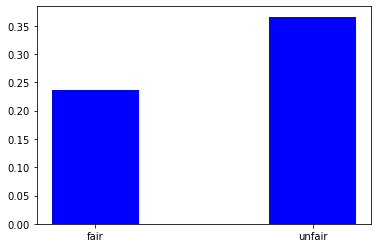

In [34]:
fair_rel_freq = 236/1000
unfair_rel_freq = 366/1000
freqs = [fair_rel_freq, unfair_rel_freq]
names = ['fair', 'unfair']
plt.bar(names, freqs, color='blue', width = 0.4);

# Scenario 2

In [37]:
fair_die = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_1.change_die_weight(6, 5)
unfair_die_2.change_die_weight(1, 5)

fair_game_dice = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game_dice.play(10000)
unfair_game_dice = Game([fair_die, fair_die, unfair_die_1, unfair_die_1, unfair_die_2])
unfair_game_dice.play(10000)

fair_analyzer_dice = Analyzer(fair_game_dice)
unfair_analyzer_dice = Analyzer(unfair_game_dice)

fair_analyzer_dice.jackpot()

,1,2,3,4,5
Roll Number,,,,,
242,5,5,5,5,5
1180,2,2,2,2,2
2690,1,1,1,1,1
2789,5,5,5,5,5
4123,6,6,6,6,6
4248,1,1,1,1,1
4317,6,6,6,6,6
5759,4,4,4,4,4
5998,2,2,2,2,2


12

In [38]:
unfair_analyzer_dice.jackpot()

,1,2,3,4,5
Roll Number,,,,,
85,2,2,2,2,2
1003,6,6,6,6,6
1902,6,6,6,6,6
2504,6,6,6,6,6
5109,6,6,6,6,6
5366,6,6,6,6,6
5673,6,6,6,6,6
5995,6,6,6,6,6
6193,6,6,6,6,6


11

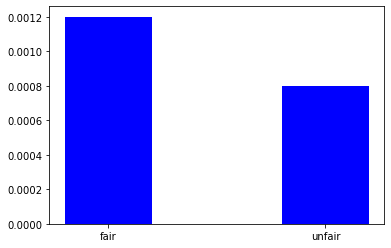

In [39]:
fair_rel_freq2 = 12/10000
unfair_rel_freq2 = 8/10000
freqs2 = [fair_rel_freq2, unfair_rel_freq2]
names2 = ['fair', 'unfair']
plt.bar(names2, freqs2, color='blue', width = 0.4);

In [42]:
fair_analyzer_dice.combo().head(10)

n
0 1 2 3 4     
1 2 3 4 5  173
2 3 4 5 6  167
1 3 4 5 6  164
  2 3 5 6  163
      4 6  162
    4 5 6  150
    2 4 6   99
    3 3 4   92
  3 4 6 6   92
    5 6 6   91

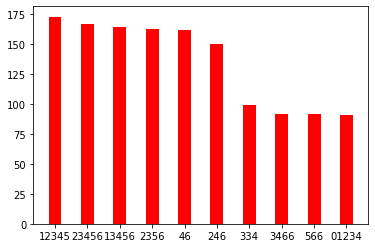

In [44]:
comb_freqs = [173, 167, 164, 163, 162, 150, 99, 92, 92, 91]
combs = ['12345', '23456', '13456', '2356', '46', '246', '334', '3466', '566', '01234']
plt.bar(combs, comb_freqs, color='red', width=0.4);

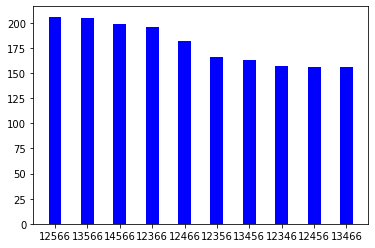

In [45]:
comb_freqs = [206, 205, 199, 196, 182, 166, 163, 157, 156, 156]
combs = ['12566', '13566', '14566', '12366', '12466', '12356', '13456', '12346', '12456', '13466']
plt.bar(combs, comb_freqs, color='blue', width=0.4);


# Scenario 3

In [52]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters = Die(np.array(alphabet))
freqs = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705,
 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544,
 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308,
 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

for i in range(len(freqs)):
    letters.change_die_weight(alphabet[i], freqs[i])
    
letter_game = Game([letters, letters, letters, letters, letters])
letter_game.play(1000)
df = letter_game.recent_results('Wide').T
print(df)
df

     0  1  2  3  4
0    a  o  w  m  s
1    u  w  e  o  s
2    e  c  t  l  f
3    t  l  r  t  e
4    l  m  e  n  u
..  .. .. .. .. ..
995  o  s  h  e  e
996  o  r  e  p  a
997  u  e  e  e  n
998  u  s  i  o  o
999  o  k  a  y  m

[1000 rows x 5 columns]


,0,1,2,3,4
0,a,o,w,m,s
1,u,w,e,o,s
2,e,c,t,l,f
3,t,l,r,t,e
4,l,m,e,n,u
...,...,...,...,...,...
995,o,s,h,e,e
996,o,r,e,p,a
997,u,e,e,e,n
998,u,s,i,o,o


# Directory Listing

A code block that executes the following bash command:

!ls -lRF -o

In [ ]:
!ls -lRF -o

In [5]:
# Installation Output Listing

#A code block that executes the code to install your your package and outputs a successful installation.

pip install -e .

SyntaxError: invalid syntax (<ipython-input-5-ccbf7d726dc8>, line 5)